In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

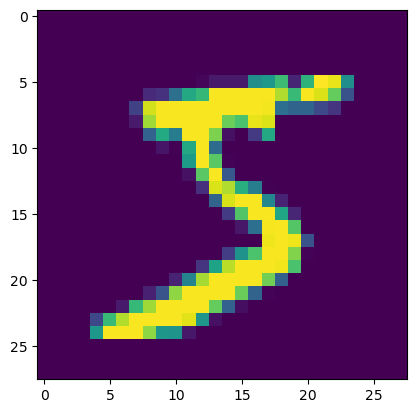

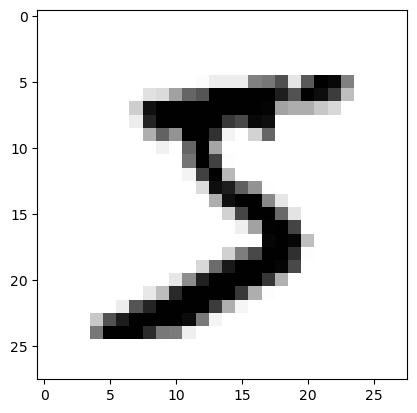

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [7]:
print(x_train[0])  ##before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

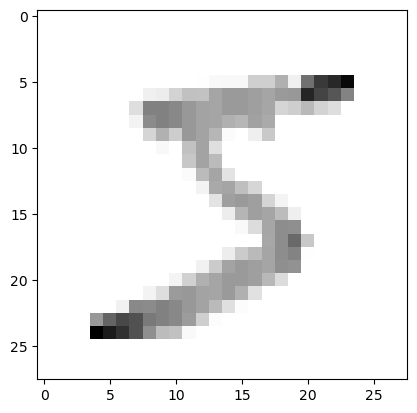

In [8]:
###in order to normalize it
x_train = tf.keras.utils.normalize (x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
###resizing image to make it suitable for convolution operation


In [13]:
import numpy as np
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [14]:
###creating neural network
###training on 60000 samples of MNIST handwritten dataset

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D 

In [17]:
model=Sequential()
###first convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

###fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

###last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print("Total training Samples= ",len(x_trainr))

Total training Samples=  60000


In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [22]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7781 - loss: 0.6845 - val_accuracy: 0.9668 - val_loss: 0.1110
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9682 - loss: 0.1008 - val_accuracy: 0.9691 - val_loss: 0.1018
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9793 - loss: 0.0677 - val_accuracy: 0.9783 - val_loss: 0.0694
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9837 - loss: 0.0509 - val_accuracy: 0.9783 - val_loss: 0.0757
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9866 - loss: 0.0449 - val_accuracy: 0.9802 - val_loss: 0.0699


In [23]:
###Evaluating testing data set MNIT
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9731 - loss: 0.0904
Test loss on 10000 test samples 0.07037469744682312
Validation Accuracy on 10000 test samples 0.9796000123023987


In [24]:
predictions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [25]:
print(predictions)

[[2.99454837e-06 2.55584255e-05 1.38873302e-05 ... 9.99946117e-01
  2.76663013e-06 4.79292976e-06]
 [2.92646233e-03 2.36723849e-06 9.96977091e-01 ... 3.50111748e-07
  8.64130052e-05 2.00103182e-06]
 [8.49807179e-07 9.99996066e-01 5.03360639e-07 ... 2.80472193e-07
  3.47746330e-08 1.81069892e-09]
 ...
 [3.18631760e-10 1.09991616e-08 3.17360582e-09 ... 1.21071281e-07
  2.28840031e-06 4.94190363e-06]
 [1.93904707e-04 1.10219162e-05 1.20281840e-07 ... 2.71246535e-07
  1.02273210e-04 7.46706701e-06]
 [1.41333485e-05 7.03832770e-10 6.58961653e-07 ... 7.91201549e-10
  1.05207414e-06 2.47227625e-08]]


In [26]:
print(np.argmax(predictions[0]))

7


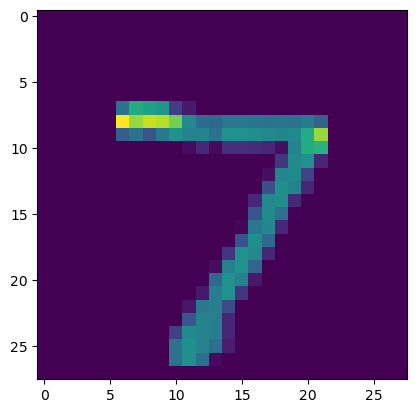

In [27]:
### the prediction was 7 lets check if its true or false
plt.imshow(x_test[0])

In [28]:
print(np.argmax(predictions[200]))

3


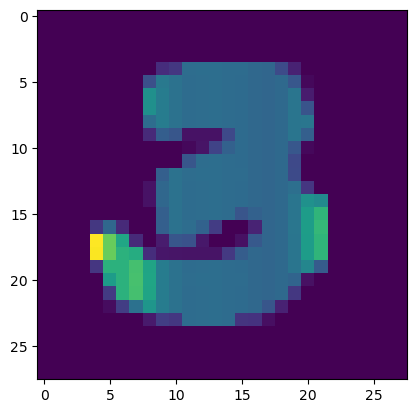

In [29]:
###check if the predictions is true or false
plt.imshow(x_test[200])

In [30]:
import cv2

In [31]:
img=cv2.imread('two.png')

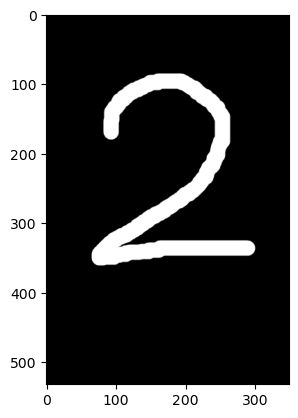

In [32]:
plt.imshow(img)

In [33]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [34]:
gray.shape

(532, 349)

In [35]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [36]:
resized.shape

(28, 28)

In [37]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [38]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [39]:
newimg.shape

(1, 28, 28, 1)

In [40]:
predictions=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [41]:
print(np.argmax(predictions))

2
